# [Classification](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)

## Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two required parameters: data and target. All the other parameters are optional.

In [1]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Functional API

PyCaret 3.0 has two API's. You can choose one of it based on your preference. The functionalities and experiment results are consistent.

In [2]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [3]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,4.7900
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0280
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0310
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2820
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0280
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,6.3230
gbc,Gradient Boosting Classifier,0.7373,0.7918,0.5550,0.6445,0.5931,0.4013,0.4059,0.1660
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1080
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.2380
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0380


In [4]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Analyze Model

This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [6]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

evaluate_model can only be used in Notebook since it uses ipywidget . You can also use the plot_model function to generate plots individually.

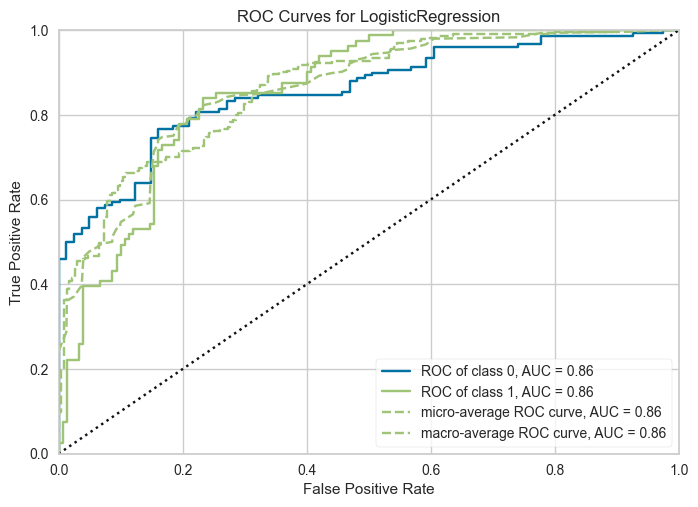

In [7]:
# functional API
plot_model(best, plot = 'auc')

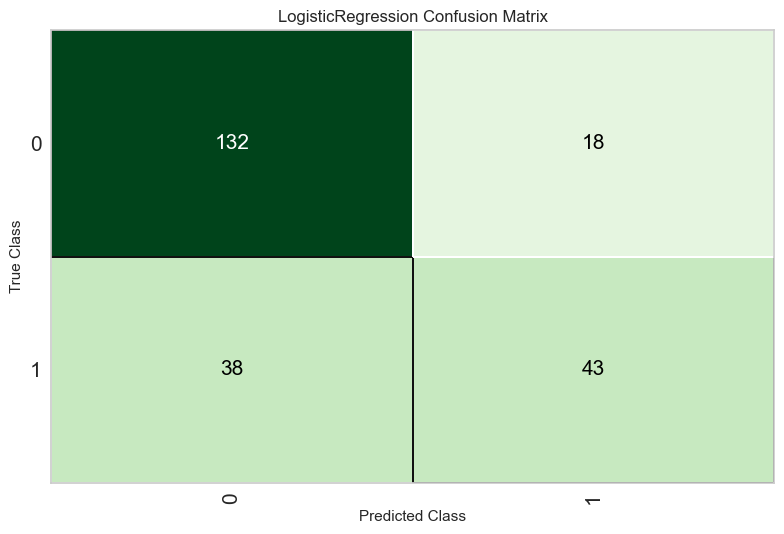

In [8]:
# functional API
plot_model(best, plot = 'confusion_matrix')

## Predictions

This function scores the data and returns prediction_label and prediction_score probability of the predicted class). When data is None, it predicts label and score on the test set (created during the setup function).

In [9]:
# functional API
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


ERROR! Session/line number was not unique in database. History logging moved to new session 160


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9393
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7998
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6391
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6229
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5986
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9243


The evaluation metrics are calculated on the test set. The second output is the pd.DataFrame with predictions on the test set (see the last two columns). To generate labels on the unseen (new) dataset, simply pass the dataset in the data parameter under predict_model function.

In [10]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7975
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8393


> Score means the probability of the predicted class (NOT the positive class). If prediction_label is 0 and prediction_score is 0.90, this means 90% probability of class 0. If you want to see the probability of both the classes, simply pass raw_score=True in the predict_model function.

In [11]:
# functional API
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8357,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3061,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9419,0.0581
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.2025,0.7975
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453,0.0547
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1607,0.8393


## Save the model

In [12]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

**To load the model back in environment:**

In [13]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\lijinlong9\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
          